<img src="resources/harvey.gif" />

## Intro
* x
* x
* x

In [63]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## S&P1500 import and cleaning

In [64]:
# Load S&P file
sp1500 = "resources/S&P1500_Sector_All.csv"
sp1500 = pd.read_csv(sp1500) 

# Display the data table for preview
sp1500.head()

,Date,(INDEX) S&P Composite 1500 / Consumer Discretionary - SEC - Total Return,(INDEX) S&P Composite 1500 / Communication Services -SEC - Total Return,(INDEX) S&P Composite 1500 / Consumer Staples - SEC - Total Return,(INDEX) S&P Composite 1500 / Energy - SEC - Total Return,(INDEX) S&P Composite 1500 / Financials - SEC - Total Return,(INDEX) S&P Composite 1500 / Health Care - SEC - Total Return,(INDEX) S&P Composite 1500 / Industrials - SEC - Total Return,(INDEX) S&P Composite 1500 / Information Technology - SEC - Total Return,(INDEX) S&P Composite 1500 / Materials - SEC - Total Return,(INDEX) S&P Composite 1500 Real Estate - SEC - Total Return,(INDEX) S&P Composite 1500 / Utilities - SEC - Total Return
0,12/30/2013,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,12/31/2013,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,1/1/2014,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,1/2/2014,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,1/3/2014,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


In [65]:
# Fix columns with slightly different formatting, to make all uniform (i.e., Communication Services and Real Estate cols)
sp1500.columns = sp1500.columns.str.replace('-SEC','- SEC').str.replace('1500 /','1500')

# Delete all special characters by replacing with empty string
sp1500.columns = sp1500.columns.str.replace(r'(','').str.replace(r')','')

# Remove remaining text we don't want
sp1500.columns = sp1500.columns.str.replace('INDEX S&P Composite 1500 ','').str.replace(' - SEC - Total Return ','')
sp1500.columns = sp1500.columns.str.replace('   ','') # replaces 3 back to back spaces left over after removing other text

# Replace space with underscore for ease of referencing column later on
sp1500.columns = sp1500.columns.str.replace(' ','_')

# Reformat date column, so we can filter on it later
sp1500['Date'] = pd.to_datetime(sp1500['Date'])

# Display the data table to see new column headers
sp1500.head()

,Date,Consumer_Discretionary,Communication_Services,Consumer_Staples,Energy,Financials,Health_Care,Industrials,Information_Technology,Materials,Real_Estate,Utilities
0,2013-12-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,2013-12-31,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
2,2014-01-01,0.37,-0.08,-0.03,0.92,0.34,0.00,0.43,0.71,0.26,-0.49,0.23
3,2014-01-02,-0.16,-0.68,-1.12,-0.44,-0.23,-0.58,-0.87,-0.36,-0.48,-0.66,-1.34
4,2014-01-03,-0.35,-1.31,-1.27,-0.69,0.39,-0.35,-0.55,-0.71,-0.58,0.02,-1.57


## Hurricane data import and cleaning

In [66]:
# Load Hurricane data
hurricane = "resources/Hurricane_data_all.csv"
hurricane = pd.read_csv(hurricane) 

# Reformat date columns, so we can use them later as part of formula
hurricane['Active_date'] = pd.to_datetime(hurricane['Active_date'])
hurricane['End_date'] = pd.to_datetime(hurricane['End_date'])

# Display the data table for preview
hurricane.head(20)

,Name,Year,Active_date,End_date,Days,Main_state,Highest_Category,Central_pressure,Max_wind,Damage_million,Direct_deaths
0,Arthur,2014,2014-07-01,2014-07-05,5,NC,2,973,85,17,1
1,Hermine,2016,2016-08-28,2016-09-03,7,FL,1,981,80,550,4
2,Matthew,2016,2016-09-28,2016-10-09,12,FL,5,934,165,"15,090",586
3,Harvey,2017,2017-08-17,2017-09-01,16,TX,4,937,130,"125,000",68
4,Irma,2017,2017-08-30,2017-09-12,14,FL,5,914,180,"64,760",52
5,Nate,2017,2017-10-04,2017-10-09,6,LA,1,981,90,787,46
6,Chris,2018,2018-07-06,2018-07-12,7,NC,2,969,105,0,1
7,Florence,2018,2018-08-31,2018-09-17,18,SC,4,939,140,"17,900",30
8,Michael,2018,2018-10-07,2018-10-12,6,FL,4,919,155,"14,600",60


## Visualizing combined S&P1500 and hurricane data

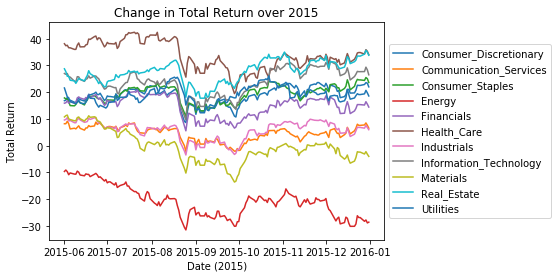

<Figure size 72x576 with 0 Axes>

In [71]:
###### TEAM ###### - CAN'T GET THE WIDTH OF THE CHART WIDER, THIS CODE NOT WORKING plt.figure(figsize=(1, 8))
# Plot 2015 as control months (no hurricanes); show 5 controls, one for each month of hurricane season

# Filter on dates and reset index
sp1500_2015 = sp1500[(sp1500['Date'] >= '6/1/2015') & (sp1500['Date'] <= '12/31/2015')]
sp1500_2015 = sp1500_2015.reset_index(drop=True)

# Plot 11 sectors
for x in range(1, 12):
    plt.plot(sp1500_2015['Date'], sp1500_2015.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2015)')
plt.title('Change in Total Return over 2015')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# plt.figure(figsize=(1, 8))
plt.show()

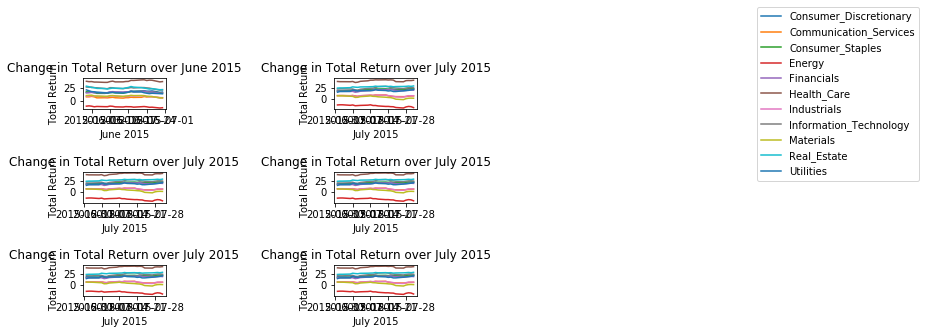

In [104]:
# Filter on dates and reset index
sp1500_2015_jun = sp1500[(sp1500['Date'] >= '6/1/2015') & (sp1500['Date'] <= '6/30/2015')]
sp1500_2015_jun = sp1500_2015_jun.reset_index(drop=True)

sp1500_2015_jul = sp1500[(sp1500['Date'] >= '7/1/2015') & (sp1500['Date'] <= '7/31/2015')]
sp1500_2015_jul = sp1500_2015_jul.reset_index(drop=True)

sp1500_2015_aug = sp1500[(sp1500['Date'] >= '8/1/2015') & (sp1500['Date'] <= '8/31/2015')]
sp1500_2015_aug = sp1500_2015_aug.reset_index(drop=True)

sp1500_2015_sep = sp1500[(sp1500['Date'] >= '9/1/2015') & (sp1500['Date'] <= '9/30/2015')]
sp1500_2015_sep = sp1500_2015_sep.reset_index(drop=True)

sp1500_2015_oct = sp1500[(sp1500['Date'] >= '10/1/2015') & (sp1500['Date'] <= '10/31/2015')]
sp1500_2015_oct = sp1500_2015_oct.reset_index(drop=True)

sp1500_2015_nov = sp1500[(sp1500['Date'] >= '11/1/2015') & (sp1500['Date'] <= '11/30/2015')]
sp1500_2015_nov = sp1500_2015_nov.reset_index(drop=True)

# Plot 6 charts in one figure
jun15 = plt.subplot(3,2,1)
for x in range(1, 12):
    plt.plot(sp1500_2015_jun['Date'], sp1500_2015_jun.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('June 2015')
plt.title('Change in Total Return over June 2015')
plt.legend(loc='center left', bbox_to_anchor=(8.0, 0.5))

jul15 = plt.subplot(3,2,2)
for x in range(1, 12):
    plt.plot(sp1500_2015_jul['Date'], sp1500_2015_jul.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('July 2015')
plt.title('Change in Total Return over July 2015')

aug15 = plt.subplot(3,2,3)
for x in range(1, 12):
    plt.plot(sp1500_2015_jul['Date'], sp1500_2015_jul.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('July 2015')
plt.title('Change in Total Return over July 2015')

sep15 = plt.subplot(3,2,4)
for x in range(1, 12):
    plt.plot(sp1500_2015_jul['Date'], sp1500_2015_jul.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('July 2015')
plt.title('Change in Total Return over July 2015')

oct15 = plt.subplot(3,2,5)
for x in range(1, 12):
    plt.plot(sp1500_2015_jul['Date'], sp1500_2015_jul.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('July 2015')
plt.title('Change in Total Return over July 2015')

nov15 = plt.subplot(3,2,6)
for x in range(1, 12):
    plt.plot(sp1500_2015_jul['Date'], sp1500_2015_jul.iloc[:,x])
plt.ylabel('Total Return')
plt.xlabel('July 2015')
plt.title('Change in Total Return over July 2015')
plt.subplots_adjust(hspace=2, wspace=2)

plt.show()

In [69]:
#

# Split table by hurricanes; 3 weeks prior to hurricane, duration of hurricane, and 3 weeks after
sp1500_2014 = sp1500[(sp1500['Date'] >= '1/1/2014') & (sp1500['Date'] <= '12/31/2014')]
sp1500_2014 = sp1500_2014.reset_index(drop=True)

sp1500_2015 = sp1500[(sp1500['Date'] >= '1/1/2015') & (sp1500['Date'] <= '12/31/2015')]
sp1500_2015 = sp1500_2015.reset_index(drop=True)

sp1500_2016 = sp1500[(sp1500['Date'] >= '1/1/2016') & (sp1500['Date'] <= '12/31/2016')]
sp1500_2016 = sp1500_2016.reset_index(drop=True)

sp1500_2017 = sp1500[(sp1500['Date'] >= '1/1/2017') & (sp1500['Date'] <= '12/31/2017')]
sp1500_2017 = sp1500_2017.reset_index(drop=True)

sp1500_2018 = sp1500[(sp1500['Date'] >= '1/1/2018') & (sp1500['Date'] <= '12/31/2018')]
sp1500_2018 = sp1500_2018.reset_index(drop=True)

In [ ]:
for x in range(1, 12):
    plt.plot(sp1500_2015['Date'], sp1500_2015.iloc[:,x])
plt.legend()
plt.ylabel('Total Return')
plt.xlabel('Date (2015)')
plt.title('Change in Total Return over 2015')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.figure(figsize=(4, 1))
plt.show()

## Statiscal analysis